# Ujian Akhir Semester Big Data and Data Mining
Nama: Eunique Lydia Stephany

NIM: 22.11.4545

# Mengimpor Library yang dibutuhkan

In [106]:
!pip install seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, classification_report,f1_score

# Load Dataset

In [107]:
#mengupload dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

df_titanic=pd.read_csv('/content/drive/MyDrive/kuliah/BDDM/titanic.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre-Processing

In [4]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [108]:
# Lanjut darisini
data = df_titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin' ])

In [15]:
data.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


In [109]:
# Check Outlier
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']

In [110]:
print(data[numerical_columns].describe())

              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


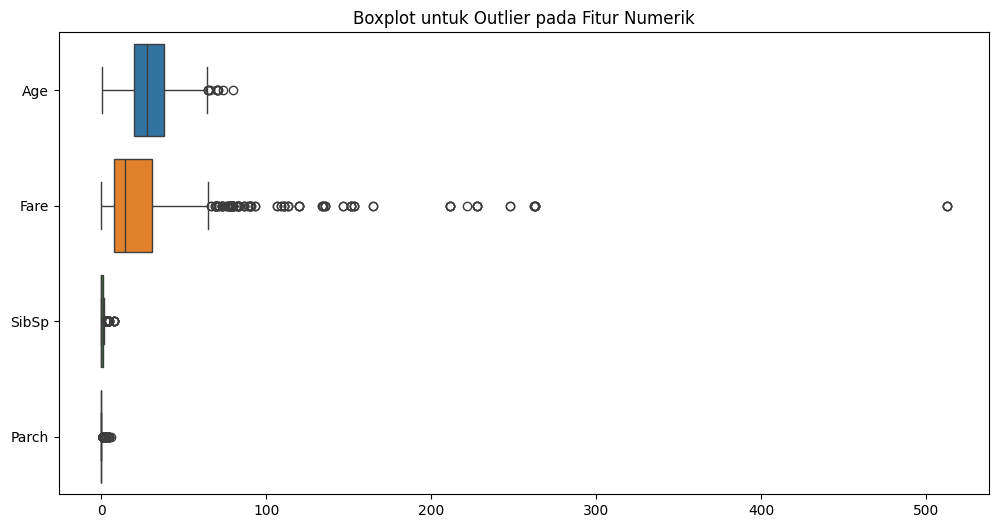

In [51]:
# Membuat Boxplot untuk mengecek outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns], orient='h')
plt.title('Boxplot untuk Outlier pada Fitur Numerik')
plt.show()

In [111]:
# Perhitungan IQR untuk setiap fitur
choosen_column = ['Fare', 'Age']
Q1 = data[choosen_column].quantile(0.25)
Q3 = data[choosen_column].quantile(0.75)
IQR = Q3 - Q1


# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (data[choosen_column] <= lower_bound) | (data[choosen_column] >= upper_bound)

# Hapus outlier
data_cleaned = data[~outlier_mask.any(axis=1)]

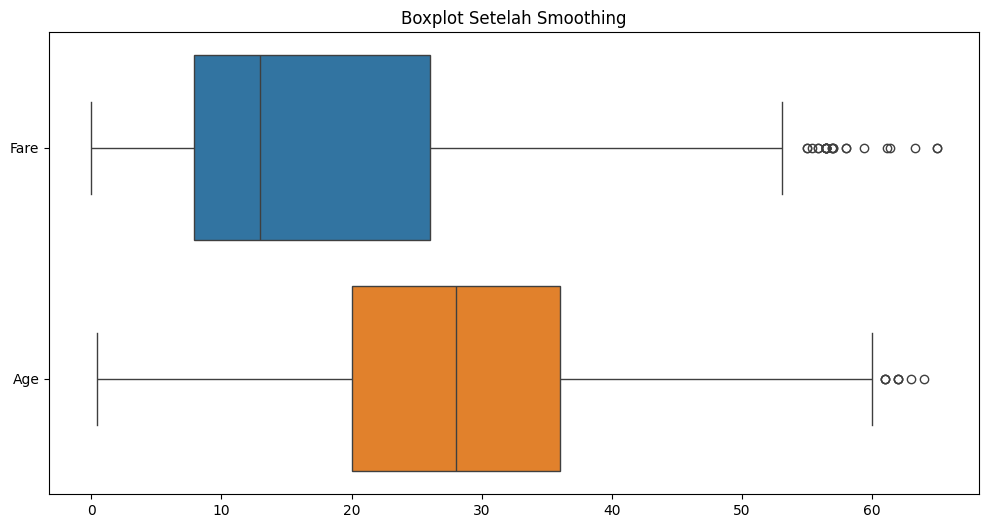

In [61]:
# Membuat Boxplot untuk mengecek outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[choosen_column], orient='h')
plt.title('Boxplot Setelah Smoothing')
plt.show()

In [71]:
data_cleaned[numerical_columns].describe()

,Age,Fare,SibSp,Parch
count,603.000000,765.000000,765.000000,765.000000
mean,28.269900,17.732232,0.443137,0.343791
std,13.468892,13.479643,0.904307,0.789810
min,0.420000,0.000000,0.000000,0.000000
25%,20.000000,7.895800,0.000000,0.000000
50%,28.000000,13.000000,0.000000,0.000000
75%,36.000000,26.000000,1.000000,0.000000
max,64.000000,65.000000,5.000000,6.000000


Batas dari box pada boxplot mengecil walau tetap ada nilai di luar garis, namun banyak faktor yang bisa dipertimbangkan seperti selisih mean dan median yang mengecil dan nilai std yang lebih kecil

In [112]:
# Mengatasi nilai null pada kolom Embarked
data = data.dropna(subset=['Embarked'])
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


In [113]:
# Pengisian nilai Null
mean_age = data_cleaned['Age'].mean()
data_cleaned['Age'] = data_cleaned['Age'].fillna(mean_age)
# Cek kembali
data_cleaned.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [114]:
print(data_cleaned)

     Survived  Pclass     Sex      Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0000      1      0   7.2500        S
2           1       3  female  26.0000      0      0   7.9250        S
3           1       1  female  35.0000      1      0  53.1000        S
4           0       3    male  35.0000      0      0   8.0500        S
5           0       3    male  28.2699      0      0   8.4583        Q
..        ...     ...     ...      ...    ...    ...      ...      ...
886         0       2    male  27.0000      0      0  13.0000        S
887         1       1  female  19.0000      0      0  30.0000        S
888         0       3  female  28.2699      1      2  23.4500        S
889         1       1    male  26.0000      0      0  30.0000        C
890         0       3    male  32.0000      0      0   7.7500        Q

[765 rows x 8 columns]


In [115]:
# Melakukan encoding data kategorikal pada fitur sex dan embarked
label_encoder = LabelEncoder()
data_cleaned['Sex'] = label_encoder.fit_transform(data_cleaned['Sex'])
data_cleaned['Embarked'] = label_encoder.fit_transform(data_cleaned['Embarked'])
print(data_cleaned)

     Survived  Pclass  Sex      Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.0000      1      0   7.2500         2
2           1       3    0  26.0000      0      0   7.9250         2
3           1       1    0  35.0000      1      0  53.1000         2
4           0       3    1  35.0000      0      0   8.0500         2
5           0       3    1  28.2699      0      0   8.4583         1
..        ...     ...  ...      ...    ...    ...      ...       ...
886         0       2    1  27.0000      0      0  13.0000         2
887         1       1    0  19.0000      0      0  30.0000         2
888         0       3    0  28.2699      1      2  23.4500         2
889         1       1    1  26.0000      0      0  30.0000         0
890         0       3    1  32.0000      0      0   7.7500         1

[765 rows x 8 columns]


Dengan menggunakan LabelEncoder mengubah fitur sex yang semula male dan female menjadi 1 dan 0, serta fitur embarked yang semula C, Q, dan S menjadi 0, 1, dan 2

# Exploratory Data Analysis

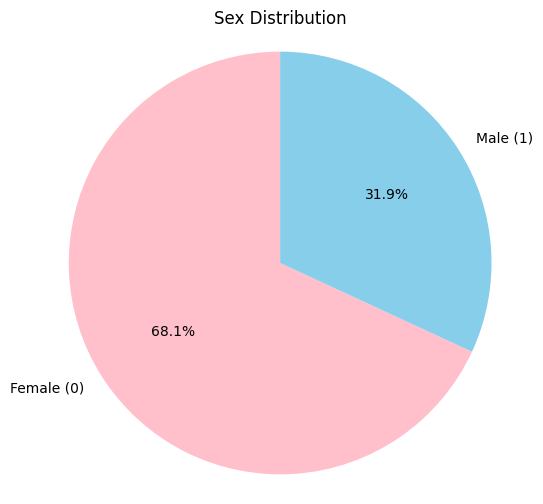

In [119]:
sex_counts = data_cleaned['Sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sex_counts, labels=['Female (0)', 'Male (1)'], autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

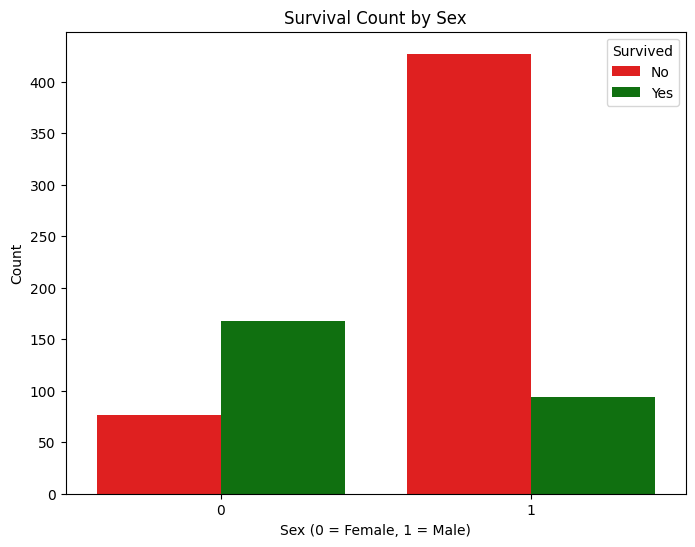

In [124]:
# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data_cleaned, palette={0: 'red', 1: 'green'}) # Changed line: Use integer keys 0 and 1
plt.title('Survival Count by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

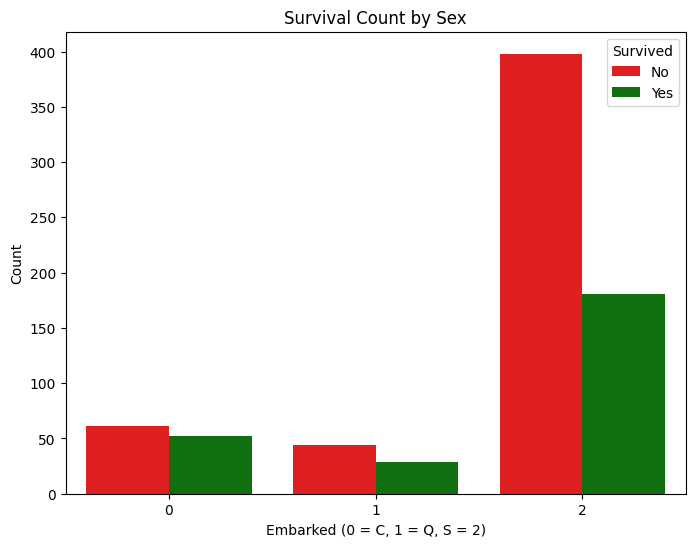

In [127]:
# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=data_cleaned, palette={0: 'red', 1: 'green'}) # Changed line: Use integer keys 0 and 1
plt.title('Survival Count by Sex')
plt.xlabel('Embarked (0 = C, 1 = Q, S = 2)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

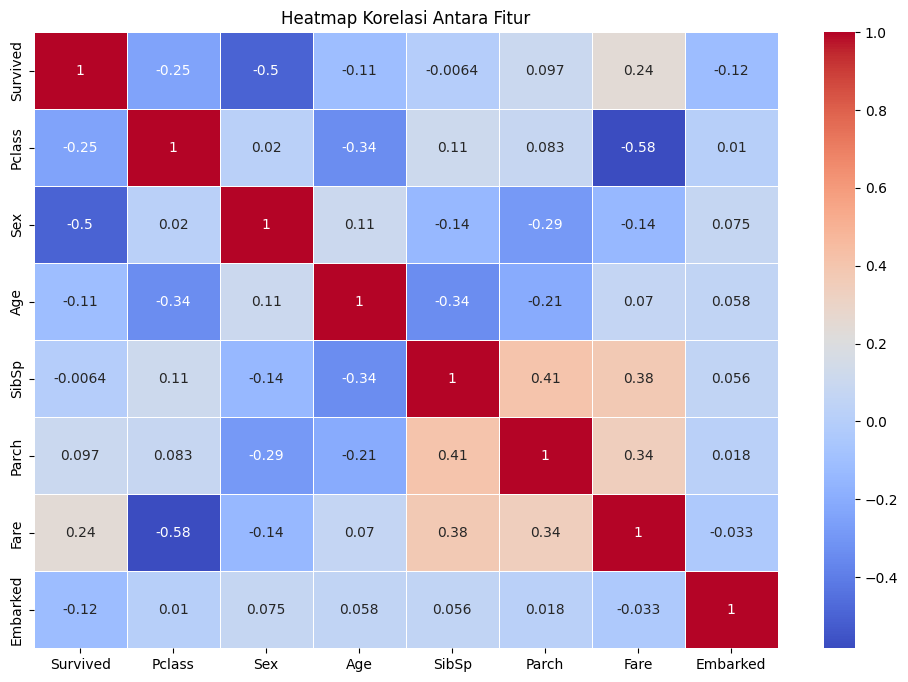

In [116]:
# Menghitung korelasi antar fitur numerik
corr_matrix = data_cleaned.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antara Fitur')
plt.show()

# Feature Selection

In [82]:
# Pisahkan fitur dan target
dataset = data_cleaned
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [83]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0000,1,0,7.2500,2
2,3,0,26.0000,0,0,7.9250,2
3,1,0,35.0000,1,0,53.1000,2
4,3,1,35.0000,0,0,8.0500,2
5,3,1,28.2699,0,0,8.4583,1
...,...,...,...,...,...,...,...
886,2,1,27.0000,0,0,13.0000,2
887,1,0,19.0000,0,0,30.0000,2
888,3,0,28.2699,1,2,23.4500,2
889,1,1,26.0000,0,0,30.0000,0


In [84]:
y

,Survived
0,0
2,1
3,1
4,0
5,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mengurangi dimensi ke 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [85]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size  :',X_test.shape)
print('y_test size  :',y_test.shape)

X_train size : (612, 7)
y_train size : (612,)
X_test size  : (153, 7)
y_test size  : (153,)


In [86]:
# Scalling data untuk menggunakan model SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat Algoritma SVM dan Melatihnya

In [89]:
# Inisialisasi model SVM
model = SVC(kernel='linear', random_state=42)

# Melatih Model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Membuat Prediction

In [94]:
predictions = model.predict(X_test)

# Hasil Klasifikasi Model

In [96]:
print('Precision : ', precision_score(y_test, predictions, average='weighted')) # Changed line

Precision :  0.7946896408770923


In [102]:
# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 79.74%


In [103]:
# Laporan Klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, predictions))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       103
           1       0.70      0.66      0.68        50

    accuracy                           0.80       153
   macro avg       0.77      0.76      0.77       153
weighted avg       0.79      0.80      0.80       153



In [104]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[89 14]
 [17 33]]


# Mengukur Performa Model

In [105]:
# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAPE
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

Mean Absolute Error (MAE): 0.20261437908496732
Mean Squared Error (MSE): 0.20261437908496732
Root Mean Squared Error (RMSE): 0.45012706993133317
Mean Absolute Percentage Error: 412094083550241.56


# KESIMPULAN:

Model SVM yang  dibuat memiliki akurasi yang cukup baik (79.74%) dan performa yang lebih baik dalam memprediksi kelas 0 (tidak selamat) dibandingkan kelas 1 (selamat).

Saran perbaikan, terutama dalam meningkatkan recall dan precision untuk kelas 1.

MAPE yang sangat besar menunjukkan adanya masalah dalam perhitungan atau data. MAPE seharusnya dalam rentang yang wajar (misalnya, 0-100%). Nilai yang sangat besar seperti ini biasanya disebabkan oleh nilai aktual yang mendekati nol atau kesalahan dalam implementasi.